
# **Task 1:** Prediction using Supervised ML

# Author: Shifa Sajid

**Task Description:**
          Predict the percentage of student based on the number of study hours.
    
**Q: What will be the predicted score if a student studies for 9.25hrs/day ?**


# Algorithm - Simple Linear Regression:


  It is a method to help us understand the relationship between two variables.
     1. Predictor (independent variable) -- X
     2. Target (dependent variable) -- Y
 
  The line is of the form:
     Y = b0 + b1X
        b0 : intercept
        b1 : slope
     

# Importing all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the Dataset 

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(20)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# Rows and Cloumns
df.shape

(25, 2)

In [8]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# Describing Statistical information on the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization 

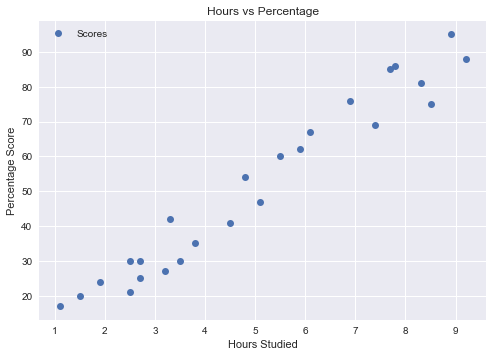

In [12]:
# Plotting the distribution of scores
plt.style.use('seaborn')
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Preparing the Data

In [14]:
X = df[['Hours']]  # feature or independent variable
Y = df['Scores']  # dependent or target

In [15]:
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [16]:
print(Y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


# Split this data into training and test sets.
We'll do this by using Scikit-Learn's built-in train_test_split() method

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

**We use training set and testing set to build a model and discover predective relationship.**

In [19]:
X_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [20]:
Y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [21]:
# Fitting a Simple Linear Regression Model Estimator

# import linear_model from Sckit-Learn
from sklearn.linear_model import LinearRegression  

# create Linear Regression object using the constructor
lm = LinearRegression()  

# then use lm.fit(x,y) to fit the model 
lm.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


Finding the slope and intercept of the line

In [23]:
b0 = lm.intercept_
print(b0)

2.018160041434683


In [24]:
b1 = lm.coef_
print(b1)

[9.91065648]


# Plotting the regression line 

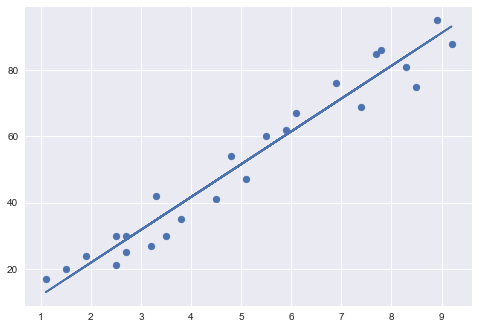

In [26]:
line = b0 + b1* X
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [28]:
print(X_test) # Testing data - In Hours
Y_pred = lm.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


# Comparing Actual vs Predicted

In [30]:
frame = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
frame

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [36]:
# You can also test with your own data
hours = 9.25
pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(pred[0],3)))

No of Hours = 9.25
Predicted Score = 93.692


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have chosen the mean square error. 

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975
